<a href="https://colab.research.google.com/github/Jeevan4n/IRON-ORE-ANALYSIS/blob/main/IRON_ore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
!pip install feature-engine
from feature_engine.outliers import Winsorizer
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.1/364.1 kB 3.1 MB/s eta 0:00:00


In [ ]:
df=pd.read_excel('/content/iron_ore_dataset.xlsx')
df.head()

,Date,Iron_Ore_Price,Global_Demand,Global_Supply,Freight_Rate,Stockpile,Production_Volume,Production_Cost,Ore_Grade,Mining_Location,Exchange_Rate_USD,Interest_Rate,Inflation_Rate,GDP_Growth_Importer,Tariffs,Steel_Production,Carbon_Emissions,Aluminum_Price,Copper_Price,Nickel_Price
0,2022-01-01,11938.020742,2310.631678,1673.831590,2496.686994,17.446315,110219.266863,5883.992186,Goethite,NaN,5.783085,1.805682,5.376856,NaN,13.641912,1645.046132,1.216302,49355.542236,113204.688508,212075.979790
1,2022-01-02,16212.064072,1879.548834,2059.746073,1036.309350,53.608420,100712.661405,6237.738165,Siderite,South Africa,NaN,4.904004,3.077467,5.581772,7.799972,1806.722736,1.503198,48261.516439,130202.450118,276565.377066
2,2022-01-03,5550.248043,1749.145018,2175.472212,1027.115407,37.217756,69023.603383,2909.088264,Goethite,Australia,7.257037,4.202138,3.013881,3.121292,11.819114,1676.901415,1.543930,40312.266934,81109.332289,187750.193708
3,2022-01-04,8786.554165,2033.115296,1866.294005,2071.088032,60.706753,108761.367584,4151.732662,Limonite,Australia,5.052935,5.645213,1.181036,2.492174,3.417648,1666.807445,2.441336,40627.740542,95074.358681,196797.927356
4,2022-01-05,15700.243788,2321.127011,2142.928296,3778.582205,82.342440,74399.122266,2827.498873,Hematite,Australia,6.551019,3.743544,3.755707,6.584033,7.353330,1518.969156,1.097101,48512.610566,147853.914375,312543.811282


In [ ]:
df.drop_duplicates()

,Date,Iron_Ore_Price,Global_Demand,Global_Supply,Freight_Rate,Stockpile,Production_Volume,Production_Cost,Ore_Grade,Mining_Location,Exchange_Rate_USD,Interest_Rate,Inflation_Rate,GDP_Growth_Importer,Tariffs,Steel_Production,Carbon_Emissions,Aluminum_Price,Copper_Price,Nickel_Price
0,2022-01-01,11938.020742,2310.631678,1673.831590,2496.686994,17.446315,110219.266863,5883.992186,Goethite,NaN,5.783085,1.805682,5.376856,NaN,13.641912,1645.046132,1.216302,49355.542236,113204.688508,212075.979790
1,2022-01-02,16212.064072,1879.548834,2059.746073,1036.309350,53.608420,100712.661405,6237.738165,Siderite,South Africa,NaN,4.904004,3.077467,5.581772,7.799972,1806.722736,1.503198,48261.516439,130202.450118,276565.377066
2,2022-01-03,5550.248043,1749.145018,2175.472212,1027.115407,37.217756,69023.603383,2909.088264,Goethite,Australia,7.257037,4.202138,3.013881,3.121292,11.819114,1676.901415,1.543930,40312.266934,81109.332289,187750.193708
3,2022-01-04,8786.554165,2033.115296,1866.294005,2071.088032,60.706753,108761.367584,4151.732662,Limonite,Australia,5.052935,5.645213,1.181036,2.492174,3.417648,1666.807445,2.441336,40627.740542,95074.358681,196797.927356
4,2022-01-05,15700.243788,2321.127011,2142.928296,3778.582205,82.342440,74399.122266,2827.498873,Hematite,Australia,6.551019,3.743544,3.755707,6.584033,7.353330,1518.969156,1.097101,48512.610566,147853.914375,312543.811282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,2024-01-01,18493.618599,2100.834047,2242.653587,1501.963912,NaN,NaN,5051.815039,Hematite,India,NaN,4.847551,2.638275,4.562913,9.436704,1524.135943,1.349399,43950.218168,156230.252408,325833.807177
731,2024-01-02,10204.298028,1869.925623,1831.942905,2213.582157,47.007774,103671.687400,NaN,Limonite,Brazil,5.029338,3.662404,1.818120,NaN,NaN,1786.975211,2.642144,49477.746962,93907.466945,220376.428035
732,2024-01-03,8630.675238,1904.765858,2293.929531,2365.515975,12.312068,119755.450133,5380.978732,Siderite,Brazil,6.728478,8.740662,2.707630,3.270889,13.971333,1626.404456,NaN,38651.625397,104608.876966,229302.613676
733,2024-01-04,10839.434211,1631.736593,1920.966106,2282.804001,29.840140,66352.042346,2807.238430,NaN,India,7.707626,1.417903,3.612864,5.504090,9.298469,1629.519605,2.466048,42093.607866,115301.361183,204928.408366


<Axes: ylabel='Iron_Ore_Price'>

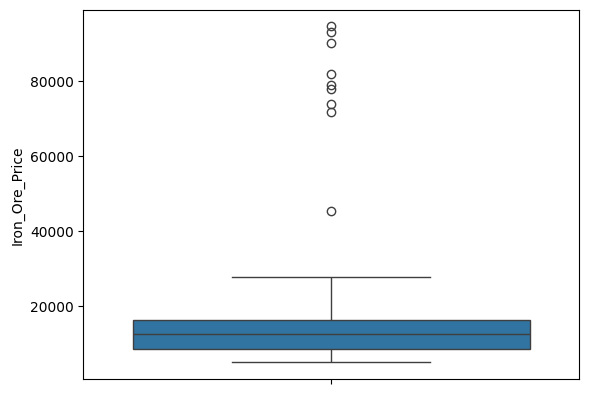

In [ ]:
sns.boxplot(df['Iron_Ore_Price'])

In [ ]:
df.describe()

,Date,Iron_Ore_Price,Global_Demand,Global_Supply,Freight_Rate,Stockpile,Production_Volume,Production_Cost,Exchange_Rate_USD,Interest_Rate,Inflation_Rate,GDP_Growth_Importer,Tariffs,Steel_Production,Carbon_Emissions,Aluminum_Price,Copper_Price,Nickel_Price
count,735,699.000000,699.000000,699.000000,699.000000,698.000000,6.980000e+02,698.000000,698.000000,699.000000,699.000000,697.000000,698.000000,699.000000,698.000000,699.000000,699.000000,699.000000
mean,2023-01-03 00:00:00,13301.199775,1943.921146,1954.004737,2505.281091,53.578930,1.389487e+05,4471.292126,6.486526,5.699526,3.478871,4.469527,7.730645,1744.362591,1.983053,42542.984547,115215.879731,248636.341822
min,2022-01-01 00:00:00,5069.480345,1502.896437,1600.094285,1000.034904,10.002765,5.003406e+04,2030.919113,5.008735,1.048993,1.006778,2.018838,0.002778,1500.511150,1.002174,25079.496644,69280.400521,144743.016726
25%,2022-07-03 12:00:00,8577.199451,1713.486248,1793.801578,1752.841643,31.336267,8.610558e+04,3258.389693,5.784583,3.481638,2.204663,3.244082,4.284551,1626.342496,1.504435,37332.905513,98740.991486,211091.464153
50%,2023-01-03 00:00:00,12532.925155,1948.031257,1953.818583,2523.415192,53.015827,1.234019e+05,4427.161885,6.515122,5.801306,3.463372,4.538184,7.674972,1742.527665,1.977147,42590.143687,115720.666495,244498.541707
75%,2023-07-05 12:00:00,16409.388881,2163.191592,2128.561431,3236.598109,75.021509,1.630933e+05,5658.890340,7.253452,8.023116,4.790094,5.635522,11.263253,1865.740479,2.486450,47484.946470,130226.168049,285010.112806
max,2024-01-05 00:00:00,94703.199185,2399.472353,2298.474599,3996.677836,99.960193,1.876471e+06,6993.964679,7.999255,9.997671,5.998538,6.997482,14.955327,1999.817813,2.995924,60830.597361,174045.356663,374408.063320
std,NaN,8809.458632,258.963011,201.840005,860.059671,25.548490,1.446962e+05,1432.162085,0.862601,2.607553,1.480765,1.421379,4.269343,144.070037,0.579804,7186.857634,21143.434667,47692.680802


In [ ]:
df.isnull().sum()

,0
Date,0
Iron_Ore_Price,36
Global_Demand,36
Global_Supply,36
Freight_Rate,36
Stockpile,37
Production_Volume,37
Production_Cost,37
Ore_Grade,37
Mining_Location,36


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 735 non-null    datetime64[ns]
 1   Iron_Ore_Price       699 non-null    float64       
 2   Global_Demand        699 non-null    float64       
 3   Global_Supply        699 non-null    float64       
 4   Freight_Rate         699 non-null    float64       
 5   Stockpile            698 non-null    float64       
 6   Production_Volume    698 non-null    float64       
 7   Production_Cost      698 non-null    float64       
 8   Ore_Grade            698 non-null    object        
 9   Mining_Location      699 non-null    object        
 10  Exchange_Rate_USD    698 non-null    float64       
 11  Interest_Rate        699 non-null    float64       
 12  Inflation_Rate       699 non-null    float64       
 13  GDP_Growth_Importer  697 non-null  

In [ ]:
# Dictionary to store the count of outliers for each column
outliers_count = {}

# Loop through each column and calculate outliers
for col in df.columns:
    if df[col].dtypes in ['int64', 'float64']:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        l = q1 - 1.5 * IQR
        u = q3 + 1.5 * IQR

        # Find outliers
        outliers = df[(df[col] < l) | (df[col] > u)]

        # Count outliers and print the count for each column
        outliers_count[col] = len(outliers)
        print(f"Outliers in {col}: {len(outliers)}")

Outliers in Iron_Ore_Price: 9
Outliers in Global_Demand: 0
Outliers in Global_Supply: 0
Outliers in Freight_Rate: 0
Outliers in Stockpile: 0
Outliers in Production_Volume: 9
Outliers in Production_Cost: 0
Outliers in Exchange_Rate_USD: 0
Outliers in Interest_Rate: 0
Outliers in Inflation_Rate: 0
Outliers in GDP_Growth_Importer: 0
Outliers in Tariffs: 0
Outliers in Steel_Production: 0
Outliers in Carbon_Emissions: 0
Outliers in Aluminum_Price: 0
Outliers in Copper_Price: 0
Outliers in Nickel_Price: 0


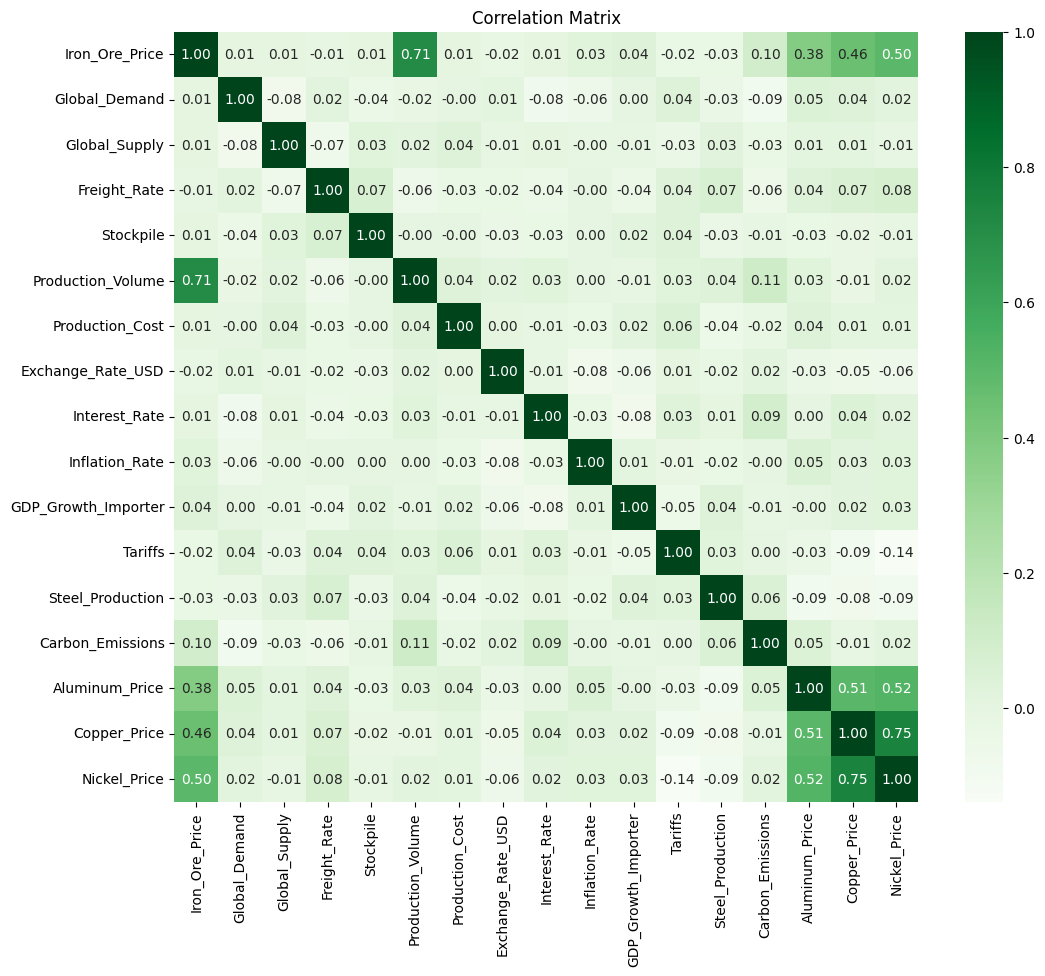

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Axes: ylabel='Iron_Ore_Price'>

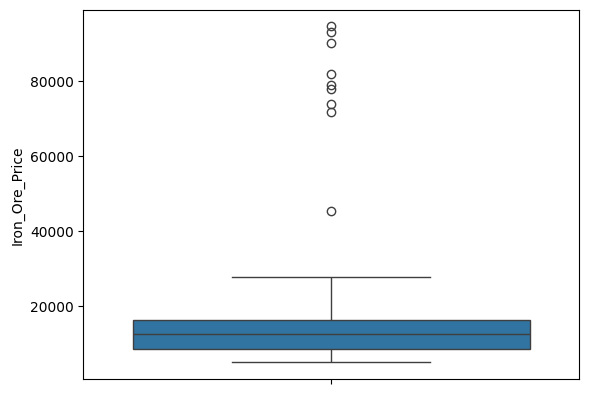

In [ ]:
sns.boxplot(df['Iron_Ore_Price'])

In [ ]:
s=df['Iron_Ore_Price'].median()
print(s)

12532.9251549686


In [ ]:
for i in df['Iron_Ore_Price']:
  df['Iron_Ore_Price']=df['Iron_Ore_Price'].fillna(s)

In [ ]:
from feature_engine.outliers import Winsorizer
winsor_iqr = Winsorizer(capping_method='iqr',
                        tail='both',
                        fold=1.5,
                        variables=['Iron_Ore_Price'])
df_s = winsor_iqr.fit_transform(df[['Iron_Ore_Price']])
df['Iron_Ore_Price']=df_s['Iron_Ore_Price']
df.head()

,Date,Iron_Ore_Price,Global_Demand,Global_Supply,Freight_Rate,Stockpile,Production_Volume,Production_Cost,Ore_Grade,Mining_Location,Exchange_Rate_USD,Interest_Rate,Inflation_Rate,GDP_Growth_Importer,Tariffs,Steel_Production,Carbon_Emissions,Aluminum_Price,Copper_Price,Nickel_Price
0,2022-01-01,11938.020742,2310.631678,1673.831590,2496.686994,17.446315,110219.266863,5883.992186,Goethite,NaN,5.783085,1.805682,5.376856,NaN,13.641912,1645.046132,1.216302,49355.542236,113204.688508,212075.979790
1,2022-01-02,16212.064072,1879.548834,2059.746073,1036.309350,53.608420,100712.661405,6237.738165,Siderite,South Africa,NaN,4.904004,3.077467,5.581772,7.799972,1806.722736,1.503198,48261.516439,130202.450118,276565.377066
2,2022-01-03,5550.248043,1749.145018,2175.472212,1027.115407,37.217756,69023.603383,2909.088264,Goethite,Australia,7.257037,4.202138,3.013881,3.121292,11.819114,1676.901415,1.543930,40312.266934,81109.332289,187750.193708
3,2022-01-04,8786.554165,2033.115296,1866.294005,2071.088032,60.706753,108761.367584,4151.732662,Limonite,Australia,5.052935,5.645213,1.181036,2.492174,3.417648,1666.807445,2.441336,40627.740542,95074.358681,196797.927356
4,2022-01-05,15700.243788,2321.127011,2142.928296,3778.582205,82.342440,74399.122266,2827.498873,Hematite,Australia,6.551019,3.743544,3.755707,6.584033,7.353330,1518.969156,1.097101,48512.610566,147853.914375,312543.811282


<Axes: ylabel='Iron_Ore_Price'>

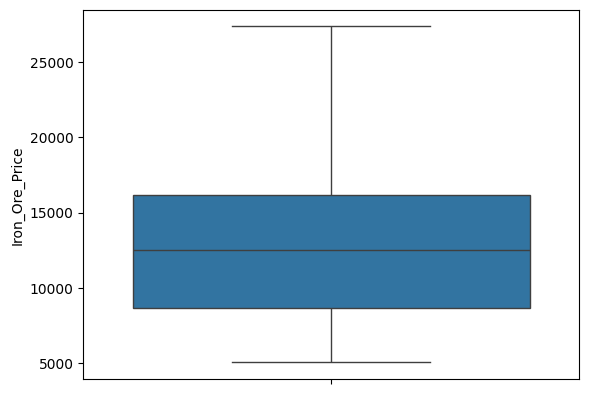

In [ ]:
sns.boxplot(df['Iron_Ore_Price'])

In [ ]:
s=st.mode(df['Ore_Grade'])
print(s)
for i in df['Ore_Grade']:
  df['Ore_Grade']=df['Ore_Grade'].fillna(s)

Siderite


In [ ]:
df['Mining_Location'].value_counts()

,count
Mining_Location,
South Africa,177
Australia,177
India,174
Brazil,171


In [ ]:
a=st.mode(df['Mining_Location'])
print(a)
for i in df['Mining_Location']:
  df['Mining_Location']=df['Mining_Location'].fillna(a)

South Africa


In [ ]:
df['Mining_Location'].value_counts()

,count
Mining_Location,
South Africa,213
Australia,177
India,174
Brazil,171


<Axes: ylabel='Global_Demand'>

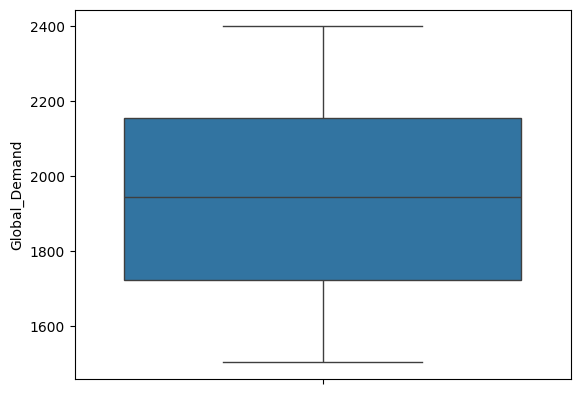

In [ ]:
a=np.mean(df['Global_Demand'])
for i in df['Global_Demand']:
  df['Global_Demand']=df['Global_Demand'].fillna(a)
sns.boxplot(df['Global_Demand'])

<Axes: ylabel='Global_Supply'>

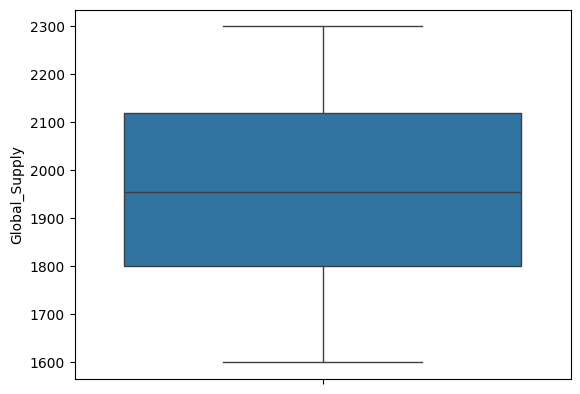

In [ ]:
a=np.mean(df['Global_Supply'])
for i in df['Global_Supply']:
  df['Global_Supply']=df['Global_Supply'].fillna(a)
sns.boxplot(df['Global_Supply'])

<Axes: ylabel='Freight_Rate'>

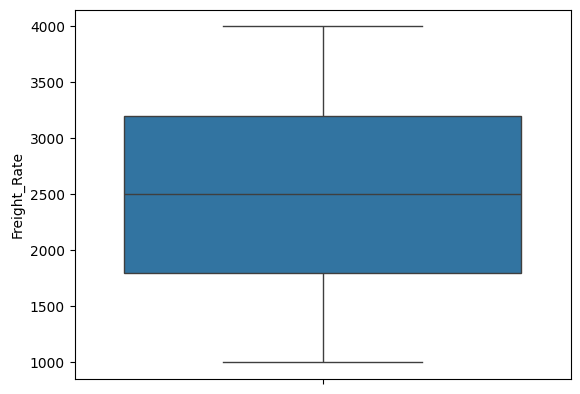

In [ ]:
a=np.mean(df['Freight_Rate'])
for i in df['Freight_Rate']:
  df['Freight_Rate']=df['Freight_Rate'].fillna(a)
sns.boxplot(df['Freight_Rate'])

In [ ]:
a=np.mean(df['Stockpile'])
for i in df['Stockpile']:
  df['Stockpile']=df['Stockpile'].fillna(a)

<Axes: ylabel='Production_Volume'>

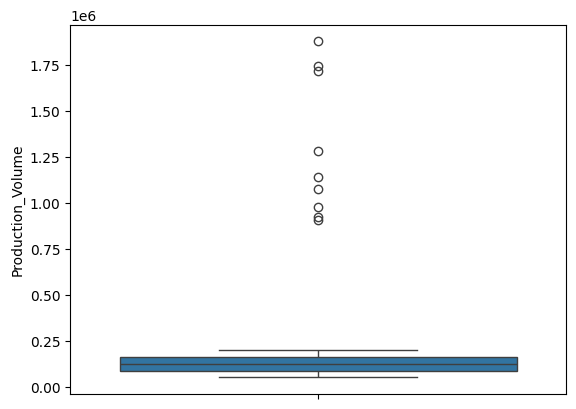

In [ ]:
sns.boxplot(df['Production_Volume'])


In [ ]:
s=df['Production_Volume'].median()
for i in df['Production_Volume']:
  df['Production_Volume']=df['Production_Volume'].fillna(s)
df['Production_Volume'].isna().sum()
from feature_engine.outliers import Winsorizer
winsor_iqr = Winsorizer(capping_method='iqr',
                        tail='both',
                        fold=1.5,
                        variables=['Production_Volume'])
df_s = winsor_iqr.fit_transform(df[['Production_Volume']])
df['Production_Volume']=df_s['Production_Volume']
df.head()

,Date,Iron_Ore_Price,Global_Demand,Global_Supply,Freight_Rate,Stockpile,Production_Volume,Production_Cost,Ore_Grade,Mining_Location,Exchange_Rate_USD,Interest_Rate,Inflation_Rate,GDP_Growth_Importer,Tariffs,Steel_Production,Carbon_Emissions,Aluminum_Price,Copper_Price,Nickel_Price
0,2022-01-01,11938.020742,2310.631678,1673.831590,2496.686994,17.446315,110219.266863,5883.992186,Goethite,South Africa,5.783085,1.805682,5.376856,NaN,13.641912,1645.046132,1.216302,49355.542236,113204.688508,212075.979790
1,2022-01-02,16212.064072,1879.548834,2059.746073,1036.309350,53.608420,100712.661405,6237.738165,Siderite,South Africa,NaN,4.904004,3.077467,5.581772,7.799972,1806.722736,1.503198,48261.516439,130202.450118,276565.377066
2,2022-01-03,5550.248043,1749.145018,2175.472212,1027.115407,37.217756,69023.603383,2909.088264,Goethite,Australia,7.257037,4.202138,3.013881,3.121292,11.819114,1676.901415,1.543930,40312.266934,81109.332289,187750.193708
3,2022-01-04,8786.554165,2033.115296,1866.294005,2071.088032,60.706753,108761.367584,4151.732662,Limonite,Australia,5.052935,5.645213,1.181036,2.492174,3.417648,1666.807445,2.441336,40627.740542,95074.358681,196797.927356
4,2022-01-05,15700.243788,2321.127011,2142.928296,3778.582205,82.342440,74399.122266,2827.498873,Hematite,Australia,6.551019,3.743544,3.755707,6.584033,7.353330,1518.969156,1.097101,48512.610566,147853.914375,312543.811282


<Axes: ylabel='Production_Volume'>

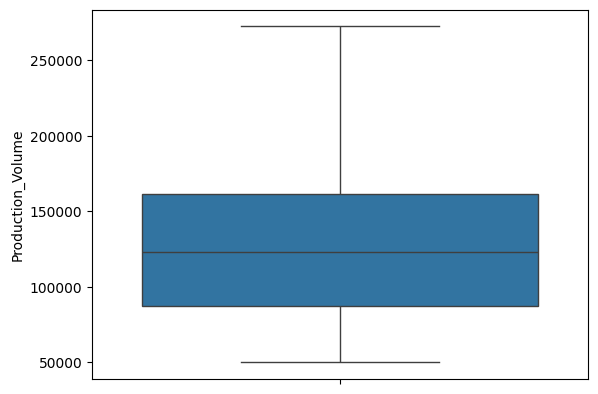

In [ ]:
sns.boxplot(df['Production_Volume'])

<Axes: ylabel='Production_Cost'>

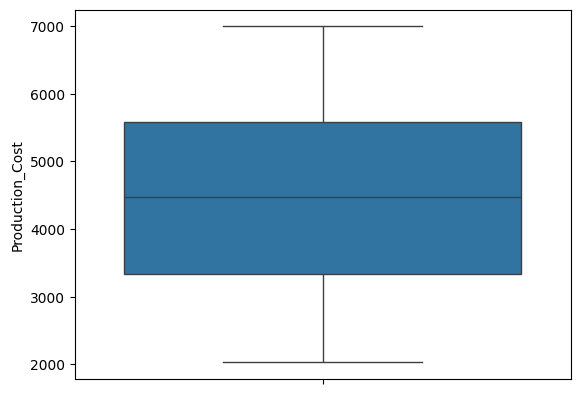

In [ ]:
a=np.mean(df['Production_Cost'])
for i in df['Production_Cost']:
  df['Production_Cost']=df['Production_Cost'].fillna(a)
sns.boxplot(df['Production_Cost'])

<Axes: xlabel='Ore_Grade', ylabel='count'>

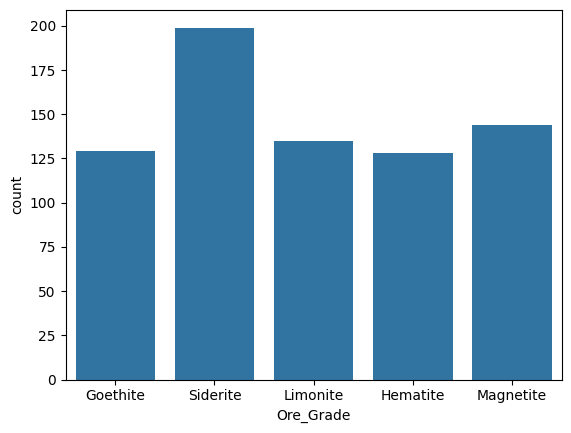

In [ ]:
sns.countplot(x='Ore_Grade', data=df)

<Axes: xlabel='Mining_Location', ylabel='count'>

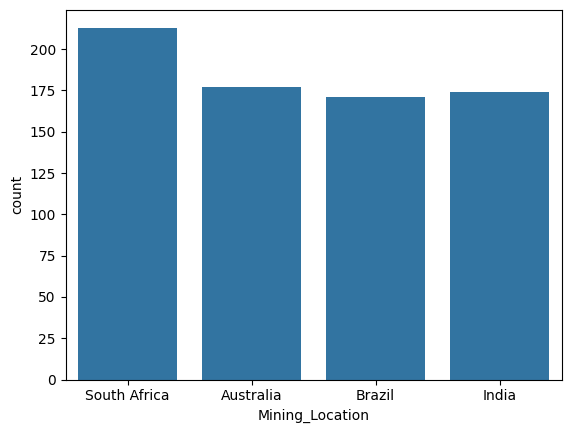

In [ ]:
sns.countplot(x='Mining_Location',data=df)

<Axes: ylabel='Exchange_Rate_USD'>

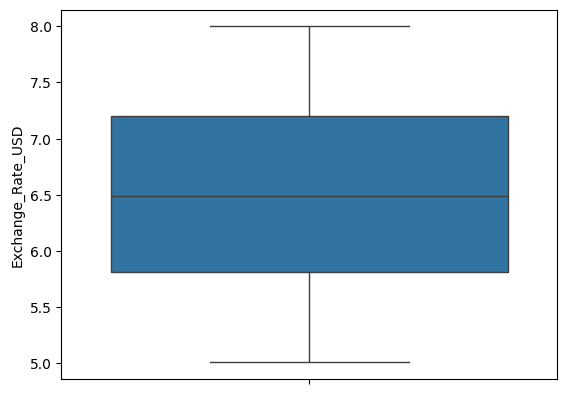

In [ ]:
a=np.mean(df['Exchange_Rate_USD'])
for i in df['Exchange_Rate_USD']:
  df['Exchange_Rate_USD']=df['Exchange_Rate_USD'].fillna(a)
sns.boxplot(df['Exchange_Rate_USD'])

<Axes: ylabel='Interest_Rate'>

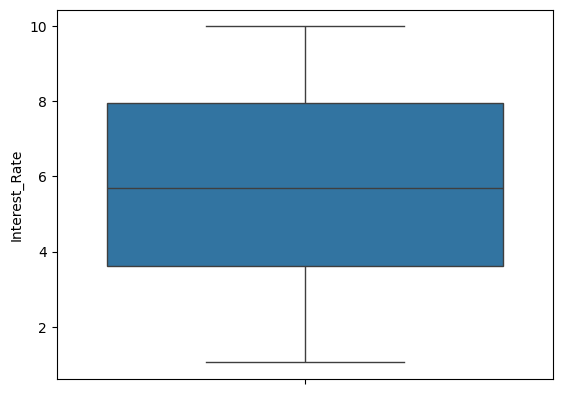

In [ ]:
a=np.mean(df['Interest_Rate'])
for i in df['Interest_Rate']:
  df['Interest_Rate']=df['Interest_Rate'].fillna(a)
sns.boxplot(df['Interest_Rate'])

<Axes: ylabel='Inflation_Rate'>

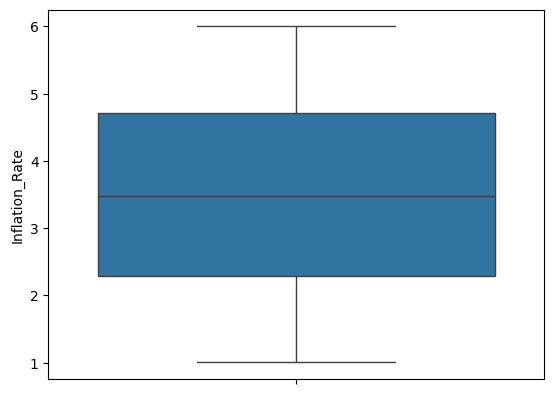

In [ ]:

a=np.mean(df['Inflation_Rate'])
for i in df['Inflation_Rate']:
  df['Inflation_Rate']=df['Inflation_Rate'].fillna(a)
sns.boxplot(df['Inflation_Rate'])

<Axes: ylabel='GDP_Growth_Importer'>

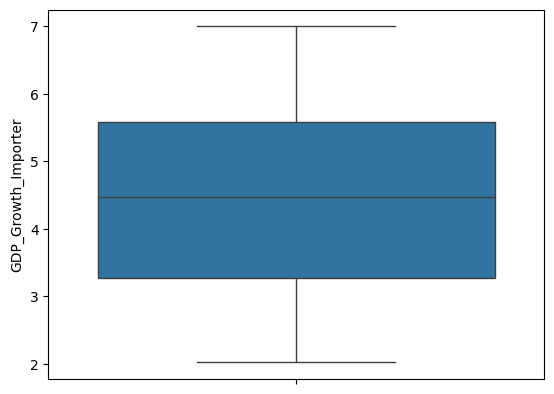

In [ ]:
a=np.mean(df['GDP_Growth_Importer'])
for i in df['GDP_Growth_Importer']:
  df['GDP_Growth_Importer']=df['GDP_Growth_Importer'].fillna(a)
sns.boxplot(df['GDP_Growth_Importer'])

<Axes: ylabel='Tariffs'>

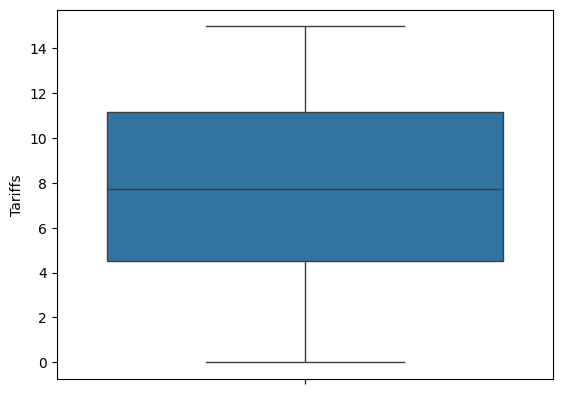

In [ ]:
#sns.boxplot(df['Tariffs'])
a=np.mean(df['Tariffs'])
for i in df['Tariffs']:
  df['Tariffs']=df['Tariffs'].fillna(a)
sns.boxplot(df['Tariffs'])

<Axes: ylabel='Steel_Production'>

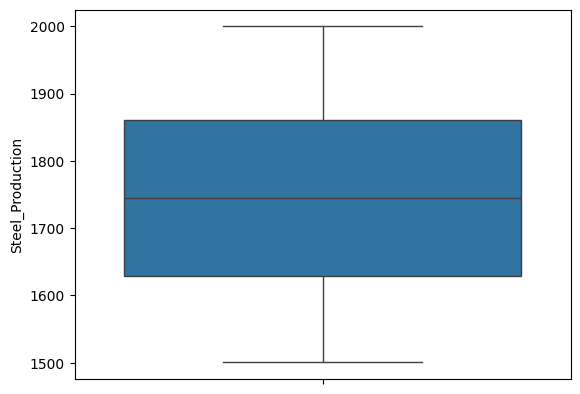

In [ ]:
#sns.boxplot(df['Steel_Production'])
a=np.mean(df['Steel_Production'])
for i in df['Steel_Production']:
  df['Steel_Production']=df['Steel_Production'].fillna(a)
sns.boxplot(df['Steel_Production'])

<Axes: ylabel='Carbon_Emissions'>

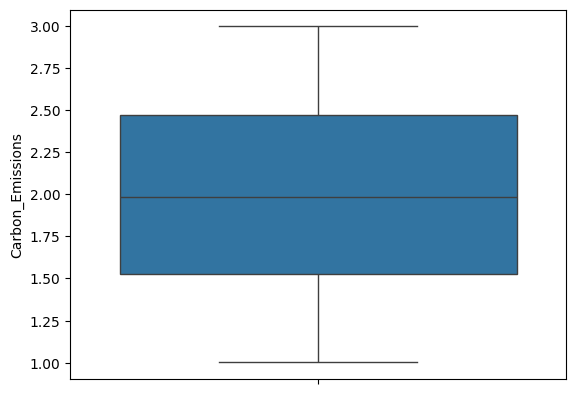

In [ ]:
#sns.boxplot(df['Carbon_Emissions'])
a=np.mean(df['Carbon_Emissions'])
for i in df['Carbon_Emissions']:
  df['Carbon_Emissions']=df['Carbon_Emissions'].fillna(a)
sns.boxplot(df['Carbon_Emissions'])

<Axes: ylabel='Aluminum_Price'>

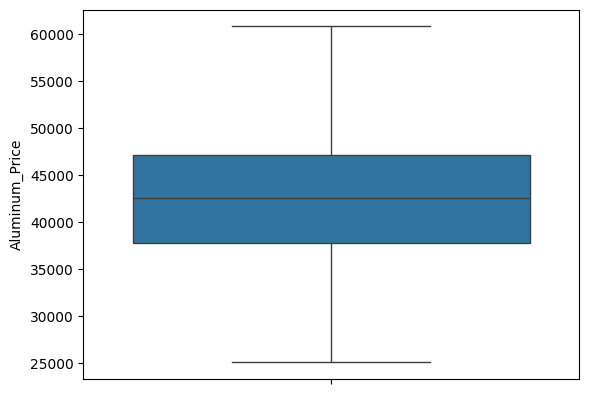

In [ ]:
#sns.boxplot(df['Aluminum_Price'])
a=np.mean(df['Aluminum_Price'])
for i in df['Aluminum_Price']:
  df['Aluminum_Price']=df['Aluminum_Price'].fillna(a)
sns.boxplot(df['Aluminum_Price'])

<Axes: ylabel='Copper_Price'>

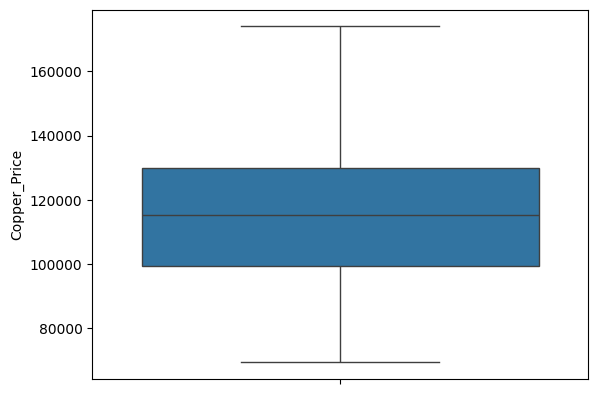

In [ ]:
#sns.boxplot(df['Copper_Price'])
a=np.mean(df['Copper_Price'])
for i in df['Copper_Price']:
  df['Copper_Price']=df['Copper_Price'].fillna(a)
sns.boxplot(df['Copper_Price'])

<Axes: ylabel='Nickel_Price'>

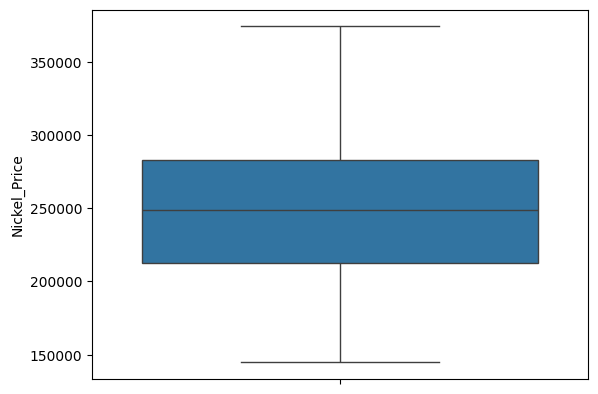

In [ ]:
#sns.boxplot(df['Nickel_Price'])
a=np.mean(df['Nickel_Price'])
for i in df['Nickel_Price']:
  df['Nickel_Price']=df['Nickel_Price'].fillna(a)
sns.boxplot(df['Nickel_Price'])

In [ ]:
df['Ore_Grade'].unique()
#df['Mining_Location'].unique()

array(['Goethite', 'Siderite', 'Limonite', 'Hematite', 'Magnetite'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,drop='first')
encoded_features=encoder.fit_transform(df[['Ore_Grade','Mining_Location']])
encoded_feature_names=encoder.get_feature_names_out(['Ore_Grade','Mining_Location'])
encoded_df=pd.DataFrame(encoded_features,columns=encoded_feature_names,index=df.index)
df=pd.concat([df,encoded_df],axis=1)
df.head(5)

,Date,Iron_Ore_Price,Global_Demand,Global_Supply,Freight_Rate,Stockpile,Production_Volume,Production_Cost,Ore_Grade,Mining_Location,...,Aluminum_Price,Copper_Price,Nickel_Price,Ore_Grade_Hematite,Ore_Grade_Limonite,Ore_Grade_Magnetite,Ore_Grade_Siderite,Mining_Location_Brazil,Mining_Location_India,Mining_Location_South Africa
0,2022-01-01,11938.020742,2310.631678,1673.831590,2496.686994,17.446315,110219.266863,5883.992186,Goethite,South Africa,...,49355.542236,113204.688508,212075.979790,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2022-01-02,16212.064072,1879.548834,2059.746073,1036.309350,53.608420,100712.661405,6237.738165,Siderite,South Africa,...,48261.516439,130202.450118,276565.377066,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2022-01-03,5550.248043,1749.145018,2175.472212,1027.115407,37.217756,69023.603383,2909.088264,Goethite,Australia,...,40312.266934,81109.332289,187750.193708,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-04,8786.554165,2033.115296,1866.294005,2071.088032,60.706753,108761.367584,4151.732662,Limonite,Australia,...,40627.740542,95074.358681,196797.927356,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-05,15700.243788,2321.127011,2142.928296,3778.582205,82.342440,74399.122266,2827.498873,Hematite,Australia,...,48512.610566,147853.914375,312543.811282,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.drop(['Ore_Grade','Mining_Location'],axis=1)

,Date,Iron_Ore_Price,Global_Demand,Global_Supply,Freight_Rate,Stockpile,Production_Volume,Production_Cost,Exchange_Rate_USD,Interest_Rate,...,Aluminum_Price,Copper_Price,Nickel_Price,Ore_Grade_Hematite,Ore_Grade_Limonite,Ore_Grade_Magnetite,Ore_Grade_Siderite,Mining_Location_Brazil,Mining_Location_India,Mining_Location_South Africa
0,2022-01-01,11938.020742,2310.631678,1673.831590,2496.686994,17.446315,110219.266863,5883.992186,5.783085,1.805682,...,49355.542236,113204.688508,212075.979790,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2022-01-02,16212.064072,1879.548834,2059.746073,1036.309350,53.608420,100712.661405,6237.738165,6.486526,4.904004,...,48261.516439,130202.450118,276565.377066,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2022-01-03,5550.248043,1749.145018,2175.472212,1027.115407,37.217756,69023.603383,2909.088264,7.257037,4.202138,...,40312.266934,81109.332289,187750.193708,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-04,8786.554165,2033.115296,1866.294005,2071.088032,60.706753,108761.367584,4151.732662,5.052935,5.645213,...,40627.740542,95074.358681,196797.927356,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-05,15700.243788,2321.127011,2142.928296,3778.582205,82.342440,74399.122266,2827.498873,6.551019,3.743544,...,48512.610566,147853.914375,312543.811282,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,2024-01-01,18493.618599,2100.834047,2242.653587,1501.963912,53.578930,123401.935736,5051.815039,6.486526,4.847551,...,43950.218168,156230.252408,325833.807177,1.0,0.0,0.0,0.0,0.0,1.0,0.0
731,2024-01-02,10204.298028,1869.925623,1831.942905,2213.582157,47.007774,103671.687400,4471.292126,5.029338,3.662404,...,49477.746962,93907.466945,220376.428035,0.0,1.0,0.0,0.0,1.0,0.0,0.0
732,2024-01-03,8630.675238,1904.765858,2293.929531,2365.515975,12.312068,119755.450133,5380.978732,6.728478,8.740662,...,38651.625397,104608.876966,229302.613676,0.0,0.0,0.0,1.0,1.0,0.0,0.0
733,2024-01-04,10839.434211,1631.736593,1920.966106,2282.804001,29.840140,66352.042346,2807.238430,7.707626,1.417903,...,42093.607866,115301.361183,204928.408366,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.head()

,Date,Iron_Ore_Price,Global_Demand,Global_Supply,Freight_Rate,Stockpile,Production_Volume,Production_Cost,Ore_Grade,Mining_Location,...,Aluminum_Price,Copper_Price,Nickel_Price,Ore_Grade_Hematite,Ore_Grade_Limonite,Ore_Grade_Magnetite,Ore_Grade_Siderite,Mining_Location_Brazil,Mining_Location_India,Mining_Location_South Africa
0,2022-01-01,11938.020742,2310.631678,1673.831590,2496.686994,17.446315,110219.266863,5883.992186,Goethite,South Africa,...,49355.542236,113204.688508,212075.979790,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2022-01-02,16212.064072,1879.548834,2059.746073,1036.309350,53.608420,100712.661405,6237.738165,Siderite,South Africa,...,48261.516439,130202.450118,276565.377066,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2022-01-03,5550.248043,1749.145018,2175.472212,1027.115407,37.217756,69023.603383,2909.088264,Goethite,Australia,...,40312.266934,81109.332289,187750.193708,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-04,8786.554165,2033.115296,1866.294005,2071.088032,60.706753,108761.367584,4151.732662,Limonite,Australia,...,40627.740542,95074.358681,196797.927356,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-05,15700.243788,2321.127011,2142.928296,3778.582205,82.342440,74399.122266,2827.498873,Hematite,Australia,...,48512.610566,147853.914375,312543.811282,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [ ]:
df.head()

,Date,Iron_Ore_Price,Global_Demand,Global_Supply,Freight_Rate,Stockpile,Production_Volume,Production_Cost,Ore_Grade,Mining_Location,...,Ore_Grade_Hematite,Ore_Grade_Limonite,Ore_Grade_Magnetite,Ore_Grade_Siderite,Mining_Location_Brazil,Mining_Location_India,Mining_Location_South Africa,year,month,day
0,2022-01-01,11938.020742,2310.631678,1673.831590,2496.686994,17.446315,110219.266863,5883.992186,Goethite,South Africa,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2022,1,1
1,2022-01-02,16212.064072,1879.548834,2059.746073,1036.309350,53.608420,100712.661405,6237.738165,Siderite,South Africa,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2022,1,2
2,2022-01-03,5550.248043,1749.145018,2175.472212,1027.115407,37.217756,69023.603383,2909.088264,Goethite,Australia,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,1,3
3,2022-01-04,8786.554165,2033.115296,1866.294005,2071.088032,60.706753,108761.367584,4151.732662,Limonite,Australia,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022,1,4
4,2022-01-05,15700.243788,2321.127011,2142.928296,3778.582205,82.342440,74399.122266,2827.498873,Hematite,Australia,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,1,5


In [ ]:
df.drop(['Date','Ore_Grade','Mining_Location'],axis=1,inplace=True)

In [ ]:
df.head(5)

,Iron_Ore_Price,Global_Demand,Global_Supply,Freight_Rate,Stockpile,Production_Volume,Production_Cost,Exchange_Rate_USD,Interest_Rate,Inflation_Rate,...,Ore_Grade_Hematite,Ore_Grade_Limonite,Ore_Grade_Magnetite,Ore_Grade_Siderite,Mining_Location_Brazil,Mining_Location_India,Mining_Location_South Africa,year,month,day
0,11938.020742,2310.631678,1673.831590,2496.686994,17.446315,110219.266863,5883.992186,5.783085,1.805682,5.376856,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2022,1,1
1,16212.064072,1879.548834,2059.746073,1036.309350,53.608420,100712.661405,6237.738165,6.486526,4.904004,3.077467,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2022,1,2
2,5550.248043,1749.145018,2175.472212,1027.115407,37.217756,69023.603383,2909.088264,7.257037,4.202138,3.013881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,1,3
3,8786.554165,2033.115296,1866.294005,2071.088032,60.706753,108761.367584,4151.732662,5.052935,5.645213,1.181036,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022,1,4
4,15700.243788,2321.127011,2142.928296,3778.582205,82.342440,74399.122266,2827.498873,6.551019,3.743544,3.755707,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,1,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Iron_Ore_Price                735 non-null    float64
 1   Global_Demand                 735 non-null    float64
 2   Global_Supply                 735 non-null    float64
 3   Freight_Rate                  735 non-null    float64
 4   Stockpile                     735 non-null    float64
 5   Production_Volume             735 non-null    float64
 6   Production_Cost               735 non-null    float64
 7   Exchange_Rate_USD             735 non-null    float64
 8   Interest_Rate                 735 non-null    float64
 9   Inflation_Rate                735 non-null    float64
 10  GDP_Growth_Importer           735 non-null    float64
 11  Tariffs                       735 non-null    float64
 12  Steel_Production              735 non-null    float64
 13  Carbo

In [ ]:
df.to_csv('jeevvv.csv',index=False)

In [ ]:
import pandas as pd
df=pd.read_csv('/content/jeevvv.csv')
df.head()

,Iron_Ore_Price,Global_Demand,Global_Supply,Freight_Rate,Stockpile,Production_Volume,Production_Cost,Exchange_Rate_USD,Interest_Rate,Inflation_Rate,...,Ore_Grade_Hematite,Ore_Grade_Limonite,Ore_Grade_Magnetite,Ore_Grade_Siderite,Mining_Location_Brazil,Mining_Location_India,Mining_Location_South Africa,year,month,day
0,11938.020742,2310.631678,1673.831590,2496.686994,17.446315,110219.266863,5883.992186,5.783085,1.805682,5.376856,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2022,1,1
1,16212.064072,1879.548834,2059.746073,1036.309350,53.608420,100712.661405,6237.738165,6.486526,4.904004,3.077467,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2022,1,2
2,5550.248043,1749.145018,2175.472212,1027.115407,37.217756,69023.603383,2909.088264,7.257037,4.202138,3.013881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,1,3
3,8786.554165,2033.115296,1866.294005,2071.088032,60.706753,108761.367584,4151.732662,5.052935,5.645213,1.181036,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022,1,4
4,15700.243788,2321.127011,2142.928296,3778.582205,82.342440,74399.122266,2827.498873,6.551019,3.743544,3.755707,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,1,5
